In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

In [141]:
df=pd.read_csv("Gold_Price_Prediction.csv",index_col="Date")

In [161]:
df.head()

,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,200 Day Moving Average,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
Date,,,,,,,,,,,,,,,,,,,,
7/24/24,2397.05,2409.86,2400.12,2365.37,-34.75,-14.29,26.120482,2387.0200,2363.0558,2168.25615,3.0,5.33,86,5.50,4.37,4.28,104.48,5505.84,15.35,77.45
7/23/24,2400.95,2397.05,2409.86,2400.12,-9.74,-24.96,29.774000,2383.0825,2362.2280,2165.85250,3.0,5.33,85,5.49,4.40,4.25,104.31,5565.30,15.21,78.27
7/22/24,2442.71,2400.95,2397.05,2409.86,12.81,8.82,34.370081,2379.1965,2360.8238,2163.46460,3.0,5.33,84,5.49,4.50,4.26,104.37,5544.54,16.79,80.39
7/19/24,2462.44,2442.71,2400.95,2397.05,-3.90,41.79,37.996575,2375.3835,2360.0924,2160.83315,3.0,5.33,79,5.48,4.49,4.25,104.16,5543.37,16.44,82.47
7/18/24,2469.65,2462.44,2442.71,2400.95,-41.76,4.46,38.405274,2373.4090,2358.9954,2158.20535,3.0,5.33,83,5.48,4.46,4.20,103.70,5608.56,14.27,83.11


In [120]:
df.shape

(676, 21)

In [158]:
df.isna().sum()

Price 2 Days Prior                         0
Price 1 Day Prior                          0
Price Today                                0
Price Tomorrow                             1
Price Change Tomorrow                      1
Price Change Ten                          10
Std Dev 10                                 9
Twenty Moving Average                      0
Fifty Day Moving Average                   0
200 Day Moving Average                     0
Monthly Inflation Rate                     0
EFFR Rate                                  0
Volume                                     0
Treasury Par Yield Month                   0
Treasury Par Yield Two Year                0
Treasury Par Yield Curve Rates (10 Yr)     0
DXY                                        0
SP Open                                    0
VIX                                        0
Crude                                      0
dtype: int64

In [159]:
# Remove missing values
df=df.dropna()

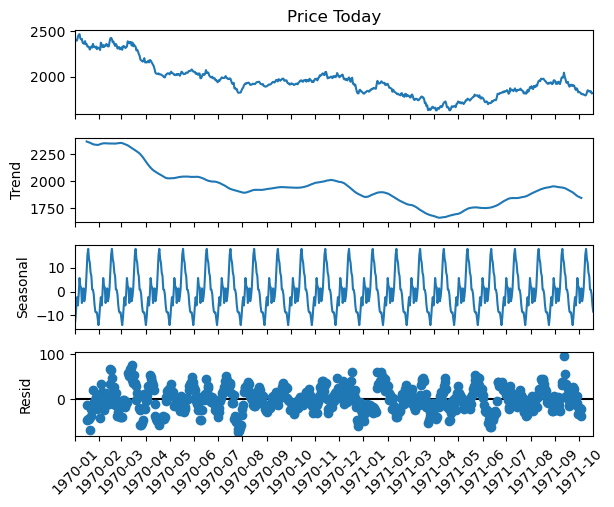

In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Price Today'], model ='additive', period = 30)
decomposition.plot()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=10)) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 
plt.xticks(rotation=45)
plt.show()

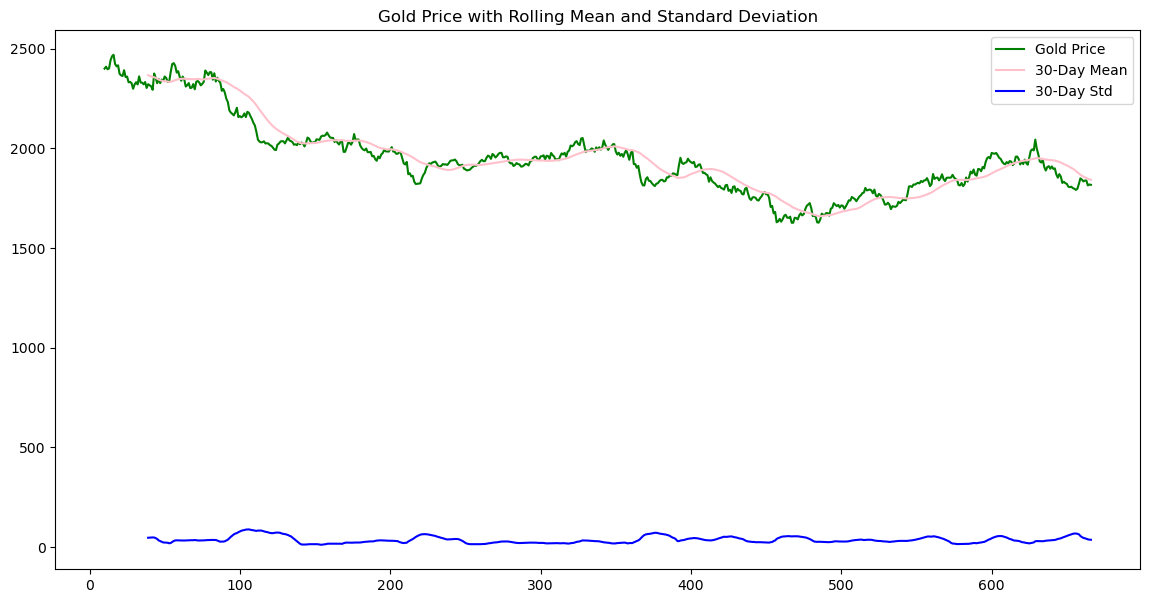

In [124]:
df['Mean'] = df['Price Today'].rolling(window=30).mean()
df['Std'] = df['Price Today'].rolling(window=30).std()


# Plot rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(df['Price Today'], label='Gold Price',color="green")
plt.plot(df['Mean'], label='30-Day Mean', color='pink')
plt.plot(df['Std'], label='30-Day Std', color='blue')
plt.title('Gold Price with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

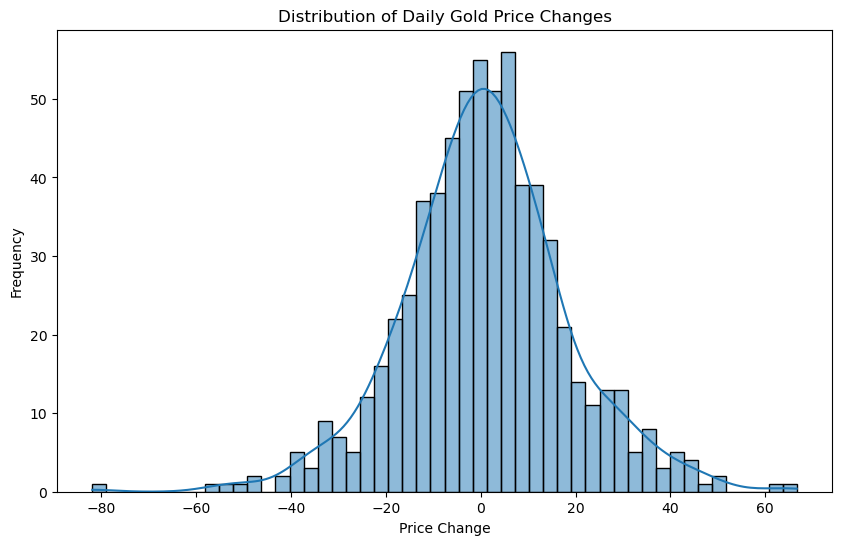

In [125]:
df['Price Change'] = df['Price Today'] - df['Price 1 Day Prior']

# Plot the distribution of price changes
plt.figure(figsize=(10, 6))
sns.histplot(df['Price Change'], bins=50, kde=True)
plt.title('Distribution of Daily Gold Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

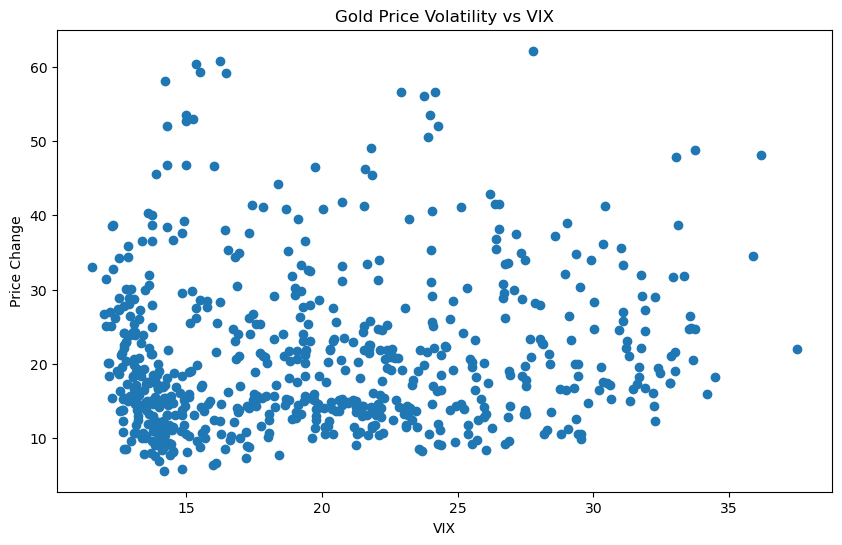

In [126]:
# Plot the gold price volatility against VIX
plt.figure(figsize=(10, 6))
plt.scatter(df["VIX"],df["Std Dev 10"])
plt.title("Gold Price Volatility vs VIX")
plt.ylabel('Price Change')
plt.xlabel('VIX')
plt.show()

In [127]:
df["Date"]=pd.to_datetime(df["Date"])

/var/folders/39/fj4zfthj4yg686qgwrvxw_pc0000gp/T/ipykernel_51392/1380596044.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"]=pd.to_datetime(df["Date"])


In [128]:
df.describe().round(2)

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude,Mean,Std,Price Change
count,657,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00,...,657.00,657.00,657.00,657.00,657.00,657.00,657.00,628.00,628.00,657.00
mean,2023-04-19 05:13:25.479452160,1951.38,1952.27,1953.15,1953.99,0.83,8.80,20.86,1936.93,1887.04,...,3.92,4.02,3.67,103.95,4400.94,19.89,84.59,1945.98,36.58,0.88
min,2022-01-14 00:00:00,1627.04,1627.04,1627.04,1627.04,-81.89,-124.29,5.59,905.14,362.06,...,0.02,0.99,1.72,94.87,3520.37,11.53,66.62,1659.56,12.10,-81.89
25%,2022-09-01 00:00:00,1825.18,1825.18,1825.68,1825.99,-9.13,-29.79,13.62,1832.97,1802.30,...,2.44,3.45,3.29,102.38,4015.54,14.19,76.60,1843.89,23.43,-9.12
50%,2023-04-19 00:00:00,1930.45,1931.37,1931.44,1931.59,0.66,2.73,18.16,1927.90,1919.30,...,4.70,4.39,3.82,104.01,4327.01,19.08,81.27,1929.76,33.08,0.66
75%,2023-12-05 00:00:00,2019.01,2019.70,2020.38,2020.74,10.90,42.39,25.42,2008.94,1992.18,...,5.51,4.74,4.24,105.52,4602.86,24.07,89.02,2008.00,46.00,10.90
max,2024-07-24 00:00:00,2469.65,2469.65,2469.65,2469.65,66.66,186.17,62.18,2387.02,2363.06,...,6.02,5.19,4.98,114.19,5644.09,37.50,124.66,2367.22,89.24,66.66
std,NaN,186.63,187.42,188.16,188.78,17.54,55.99,10.49,195.80,281.78,...,1.96,1.03,0.74,3.36,490.10,6.10,11.96,174.86,16.65,17.49


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 10 to 666
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    657 non-null    datetime64[ns]
 1   Price 2 Days Prior                      657 non-null    float64       
 2   Price 1 Day Prior                       657 non-null    float64       
 3   Price Today                             657 non-null    float64       
 4   Price Tomorrow                          657 non-null    float64       
 5   Price Change Tomorrow                   657 non-null    float64       
 6   Price Change Ten                        657 non-null    float64       
 7   Std Dev 10                              657 non-null    float64       
 8   Twenty Moving Average                   657 non-null    float64       
 9   Fifty Day Moving Average                657 non-null    fl

In [130]:
df[df.duplicated()] #no duplicates

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude,Mean,Std,Price Change


<Axes: >

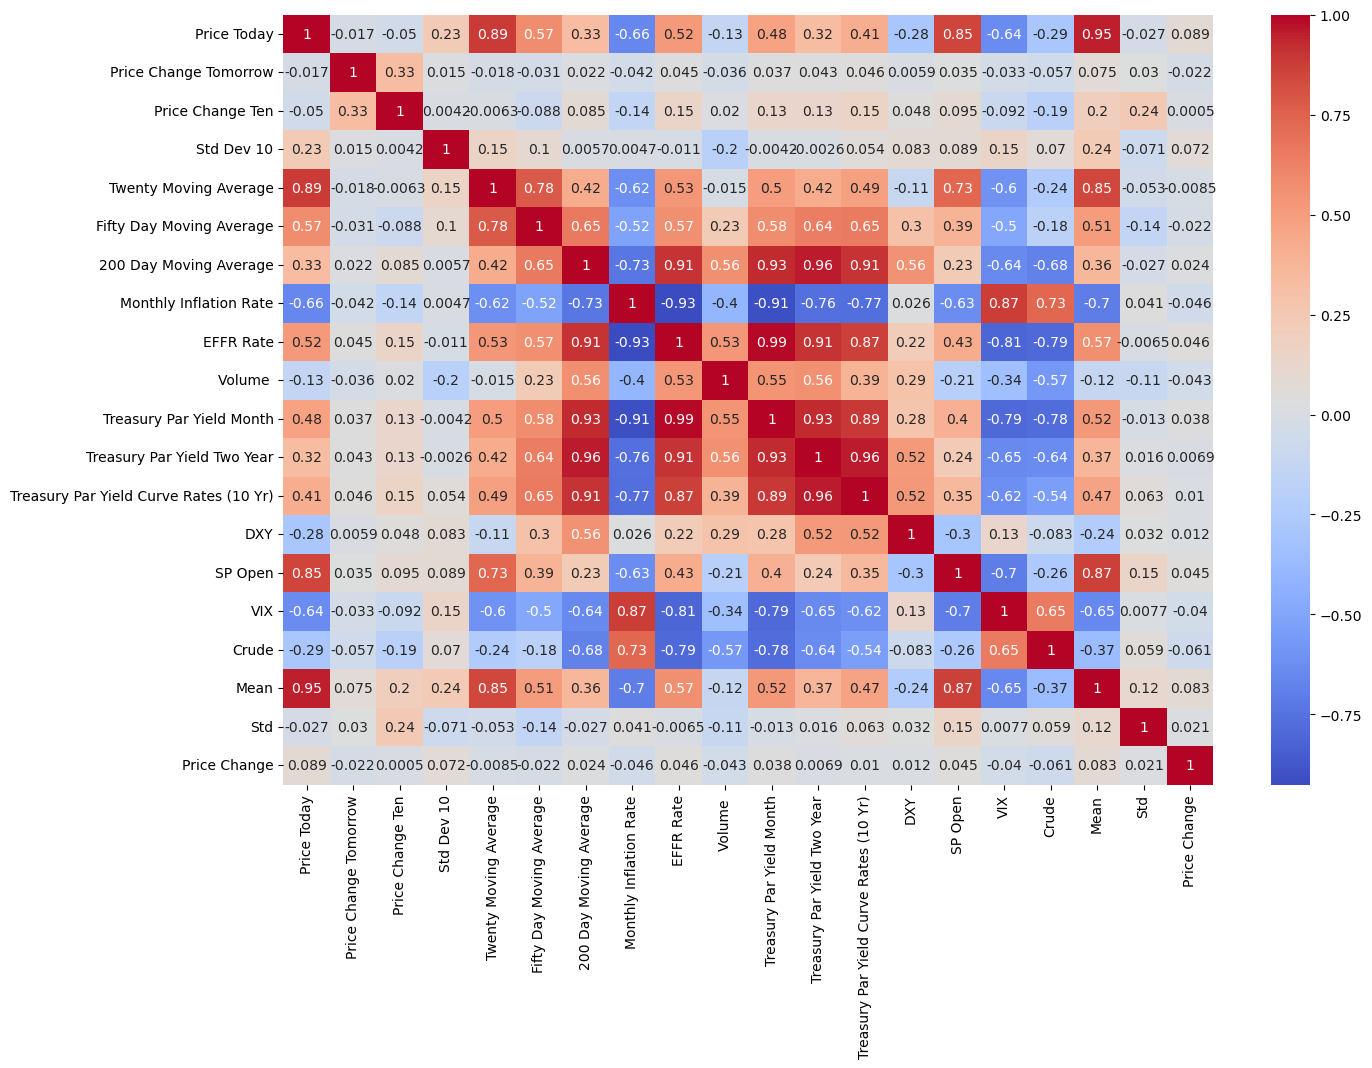

In [139]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm')

Now we get rid of redundancies

In [132]:
df_redundancies=df[["Price 2 Days Prior","Price 1 Day Prior","Price Tomorrow"]]

In [133]:
df=df.drop(columns=df_redundancies)

In [134]:
df=df.dropna()

In [135]:
X=df.drop(columns=["Price Today","Date"])
y=df["Price Today"]

Training the model

In [136]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((502, 19), (502,), (126, 19), (126,))

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


model = RandomForestRegressor(n_estimators=100)
model.fit(Xtrain, ytrain)
p=model.predict(Xtrain)
print(mean_absolute_error(p,ytrain))
print(mean_squared_error(p,ytrain))

#Trying the model of test data
ptest=model.predict(Xtest)
print(mean_absolute_error(ptest,ytest))
print(mean_squared_error(ptest,ytest))

#best model

4.098005976095509
31.199816688246916
9.643423809523515
182.1326432023739


In [138]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(Xtrain, ytrain)
predictions = knn_model.predict(Xtrain)
print(mean_absolute_error(predictions,ytrain))
print(mean_absolute_error(predictions,ytrain))

ptest=knn_model.predict(Xtest)
print(mean_absolute_error(ptest,ytest))
print(mean_squared_error(ptest,ytest))

9.429430278884467
9.429430278884467
12.694492063492095
261.2590077142866


In [ ]:
git remote add origin https://github.com/your-username/your-repository-name.git
